___Q1. Perform KNN on the train dataset. (DV-'Pclass' & IDV-remaining columns) Also select the best k-value.___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import neighbors

In [2]:
path='/content/drive/My Drive/train.csv'
Data=pd.read_csv(path)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Data=Data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
Data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
Data=Data.fillna(method='ffill')
Data.isnull().sum().sum()

0

In [7]:
Data.duplicated().sum()

58

In [8]:
Data=Data.drop_duplicates()
Data.duplicated().sum()

0

In [9]:
le=LabelEncoder()
Data['Sex']=le.fit_transform(Data['Sex'])
Data['Embarked']=le.fit_transform(Data['Embarked'])
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [10]:
x=Data.drop(['Pclass'],axis=1)
y=Data.Pclass
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
score=[]
for i in range(1,268):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score.append(accuracy_score(knn.predict(x_test),y_test,normalize=True))

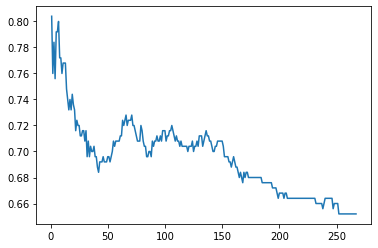

In [12]:
plt.plot(range(1,268),score)

* From the above graph we finalise that highest accuracy is obtained when k-value is equal to 1.

In [34]:
y1=Data.Pclass
x1=Data.drop(["Pclass"],axis=1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=0)
knn=neighbors.KNeighborsClassifier(n_neighbors=1)
print("Accuracy score of the model is:")
knn.fit(x1_train,y1_train).score(x1_test,y1_test)

Accuracy score of the model is:


0.804

In [22]:
y1_pred=knn.predict(x1_test)
confusion_matrix(y1_test,y1_pred)

array([[ 57,   2,   4],
       [ 15,  31,  15],
       [  1,  12, 113]])

___Q2. Perform SVM on the train dataset.(Keep changing the DV and remaining columns be IDV)___

In [23]:
from sklearn import svm

In [24]:
Data1=Data
Data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [26]:
def model(col):
    Y=Data1[col]
    X=Data1.drop([col],axis=1)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
    clf=svm.SVC(gamma=0.01,C=100)
    clf.fit(X_train,Y_train)
    print(f"Accuracy Score of the model is {accuracy_score(clf.predict(X_test),Y_test,normalize=True)}")
    print(f"Confusion matrix:\n{confusion_matrix(clf.predict(X_test),Y_test)}")

In [28]:
model('Survived')

Accuracy Score of the model is 0.7
Confusion matrix:
[[102  34]
 [ 41  73]]


In [29]:
model('Sex')

Accuracy Score of the model is 0.672
Confusion matrix:
[[ 52  26]
 [ 56 116]]


In [30]:
model('Embarked')

Accuracy Score of the model is 0.692
Confusion matrix:
[[ 18   1  21]
 [  1   7  11]
 [ 30  13 148]]


In [31]:
model('Parch')

Accuracy Score of the model is 0.724
Confusion matrix:
[[153  24  10   1   0   0   1]
 [ 13  18   1   0   0   0   0]
 [ 10   5  10   1   1   0   0]
 [  1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


In [32]:
model('SibSp')

Accuracy Score of the model is 0.7
Confusion matrix:
[[134  36   8   2   0   2]
 [ 16  35   2   1   1   0]
 [  1   2   0   1   0   0]
 [  0   2   0   2   0   0]
 [  0   0   0   0   3   0]
 [  1   0   0   0   0   1]]
